# Cluster speed

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [ ]:
data = pd.read_csv('/work/dataset_5secondWindow_speed.csv', index_col=0)

In [ ]:
set(data['activityrecognition#1'])

In [ ]:
data.head()

,id,time,activityrecognition#0,activityrecognition#1,speed#mean,speed#min,speed#max,speed#std,target,user
0,16170,78.0,NaN,100.0,0.000000,0.000000,0.000000,0.000000,Still,U12
1,15871,145.0,NaN,100.0,16.539349,16.539349,16.539349,0.628595,Car,U12
2,16811,150.0,NaN,100.0,0.000000,0.000000,0.000000,0.000000,Still,U12
3,15831,105.0,NaN,77.0,17.739895,17.739895,17.739895,0.628595,Car,U12
4,876,77.0,NaN,100.0,9.000000,9.000000,9.000000,NaN,Car,U1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5893 entries, 0 to 5892
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     5893 non-null   int64  
 1   time                   5893 non-null   float64
 2   activityrecognition#0  0 non-null      float64
 3   activityrecognition#1  5893 non-null   float64
 4   speed#mean             3520 non-null   float64
 5   speed#min              3520 non-null   float64
 6   speed#max              3520 non-null   float64
 7   speed#std              1318 non-null   float64
 8   target                 5893 non-null   object 
 9   user                   5893 non-null   object 
dtypes: float64(7), int64(1), object(2)
memory usage: 635.5+ KB


In [ ]:
data.describe()

,id,time,activityrecognition#0,activityrecognition#1,speed#mean,speed#min,speed#max,speed#std
count,5893.000000,5893.000000,0.0,5893.000000,3520.000000,3520.000000,3520.000000,1318.000000
mean,10685.407263,117.731716,NaN,87.718310,8.235254,8.216747,8.253528,0.236959
std,6921.229833,126.474151,NaN,24.562728,11.870711,11.866102,11.877158,0.453205
min,0.000000,3.000000,NaN,3.000000,0.000000,0.000000,0.000000,0.000000
25%,4502.000000,31.000000,NaN,90.000000,0.000431,0.000000,0.000431,0.000000
50%,10959.000000,70.000000,NaN,100.000000,1.710000,1.700000,1.710000,0.018236
75%,17049.000000,152.000000,NaN,100.000000,10.250000,10.250000,10.250000,0.252936
max,22045.000000,682.000000,NaN,100.000000,51.360060,51.360060,51.360060,3.842801


In [ ]:
data.shape

(5893, 10)

In [ ]:
data.columns

Index(['id', 'time', 'activityrecognition#0', 'activityrecognition#1',
       'speed#mean', 'speed#min', 'speed#max', 'speed#std', 'target', 'user'],
      dtype='object')

In [ ]:
df = data.drop(['activityrecognition#0', 'activityrecognition#1', 'id', 'target', 'user'],axis=1)

In [ ]:
#mydf = pd.read_fwf('/work/U1/sensorfile_U1_Walking_1480512323378.csv')

In [ ]:
mydata=[]
path = "/work/U1/*.csv"
for fname in glob.glob(path):
    print(fname)
    mydf = pd.read_csv(str(fname))
    mydata.append(mydf['speed#std'])

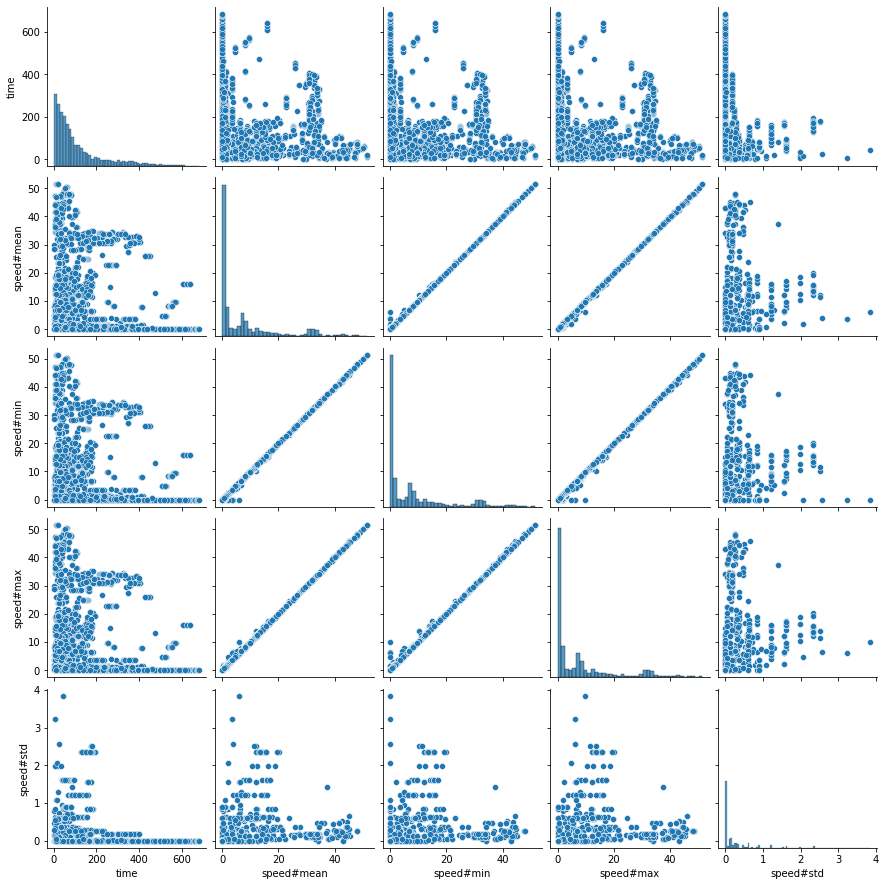

In [ ]:
sns.pairplot(df)

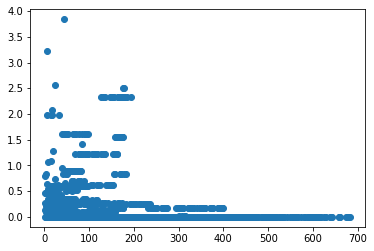

In [ ]:
plt.scatter(df.time,df['speed#std'])

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, ShuffleSplit, GridSearchCV, train_test_split, StratifiedKFold, cross_val_predict


In [ ]:
y=data.target
x=data.drop(['activityrecognition#0', 'activityrecognition#1', 'id', 'target', 'user'],axis=1)


In [ ]:
#split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
model = XGBClassifier()
model.fit(x_train,y_train)

/root/venv/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[11:56:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
pred = model.predict(x_test)

In [ ]:
predictions = cross_val_predict(model,x_test,y_test)

/root/venv/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[11:59:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
/root/venv/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; an

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

In [ ]:
balanced_accuracy_score(y_test, predictions)*100

58.829031724697046

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dd66c499-8cd9-44d2-87d5-ecc9c3ddd387' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>